In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles # need pip install matplotlib_venn
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as goq
import math
import os
import missingno as msno
from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('output/WorldBank_Climate_Data.csv')
df

,Country Name,Year,Country Code,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),"Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary and secondary (gross), gender parity index (GPI)",...,Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),"Foreign direct investment, net inflows (% of GDP)",Cereal yield (kg per hectare),Forest area (% of land area),Forest area (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km),Temperature
0,Aruba,1980,ABW,50.472,30332.0,0.178188,60097.0,0.208214,0.000000,1.801101,...,0.000000,79.440362,724.505825,21575.662731,0.000000,115769.369567,11.111111,11.111111,20.000000,28.23
1,Aruba,1981,ABW,50.456,30557.0,0.739053,60561.0,0.769120,0.000000,1.740488,...,0.000000,74.827728,682.280735,20462.763416,0.000000,107664.729574,11.111111,11.111111,20.000000,27.99
2,Aruba,1982,ABW,50.441,30941.0,1.248837,61341.0,1.279734,0.000000,1.818376,...,0.000000,83.801181,751.460978,22349.706956,0.000000,120115.571298,11.111111,11.111111,20.000000,27.87
3,Aruba,1983,ABW,50.426,31372.0,1.383361,62213.0,1.411552,0.000000,1.355550,...,0.000000,38.116389,377.294190,12291.191029,3.492567,49620.650800,11.111111,11.111111,20.000000,28.53
4,Aruba,1984,ABW,50.411,31671.0,0.948566,62826.0,0.980502,0.000000,2.067056,...,0.000000,107.243406,945.743061,27612.911827,0.000000,154206.855753,11.111111,11.111111,20.000000,27.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,Zimbabwe,2016,ZWE,32.296,4531238.0,1.274094,14030338.0,1.549294,59.500000,0.967408,...,30.184419,56.526745,1.669274,435.100000,45.570273,176288.600000,10.339925,41.876696,162000.000000,22.19
8360,Zimbabwe,2017,ZWE,32.237,4589452.0,1.276544,14236599.0,1.459406,58.200000,0.977384,...,33.977124,17.710697,1.299939,622.000000,45.451183,175827.900000,10.339925,41.876696,162000.000000,21.65
8361,Zimbabwe,2018,ZWE,32.209,4650597.0,1.323497,14438812.0,1.410382,55.900000,0.987236,...,27.728171,20.479793,3.814032,579.100000,45.332093,175367.200000,10.339925,41.876696,162000.000000,22.03
8362,Zimbabwe,2019,ZWE,32.210,4717307.0,1.424249,14645473.0,1.421142,54.600000,0.956716,...,52.005092,5.683258,1.653631,2627.071857,45.213002,174906.500000,13.469086,35.351614,247559.498555,22.30


In [3]:
df[df['Country Name'] == 'Canada'].Temperature.mean()

-4.367804878048782

In [6]:
col = "Total greenhouse gas emissions (kt of CO2 equivalent)"
df_corr = df.corr(method="pearson", min_periods=100)
df_corr.loc[:, [col]].sort_values(by=col)

,Total greenhouse gas emissions (kt of CO2 equivalent)
CO2 emissions from liquid fuel consumption (% of total),-0.227952
Temperature,-0.198925
Electricity production from hydroelectric sources (% of total),-0.134282
Electricity production from oil sources (% of total),-0.123753
"Mortality rate, under-5 (per 1,000 live births)",-0.099903
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.097612
Population growth (annual %),-0.089961
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",-0.063345
Urban population growth (annual %),-0.048286
"Electricity production from renewable sources, excluding hydroelectric (% of total)",-0.031366


In [38]:
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5).index

Index(['CO2 emissions from solid fuel consumption (% of total)',
       'Electricity production from coal sources (% of total)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'Urban population (% of total population)',
       'CO2 emissions from gaseous fuel consumption (kt)'],
      dtype='object')

In [34]:
df_corr = df.corr(method="kendall")
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5)

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.399229
CO2 emissions from solid fuel consumption (kt),-0.333534
CO2 emissions (kt),-0.291999
Electricity production from coal sources (% of total),-0.273788
CO2 emissions from gaseous fuel consumption (kt),-0.255753


In [35]:
df_corr = df.corr(method="spearman")
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5)

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.561173
CO2 emissions from solid fuel consumption (kt),-0.450135
CO2 emissions (kt),-0.428360
Electricity production from coal sources (% of total),-0.391902
CO2 emissions from liquid fuel consumption (kt),-0.365935


Text(0.5, 1.0, 'The world')

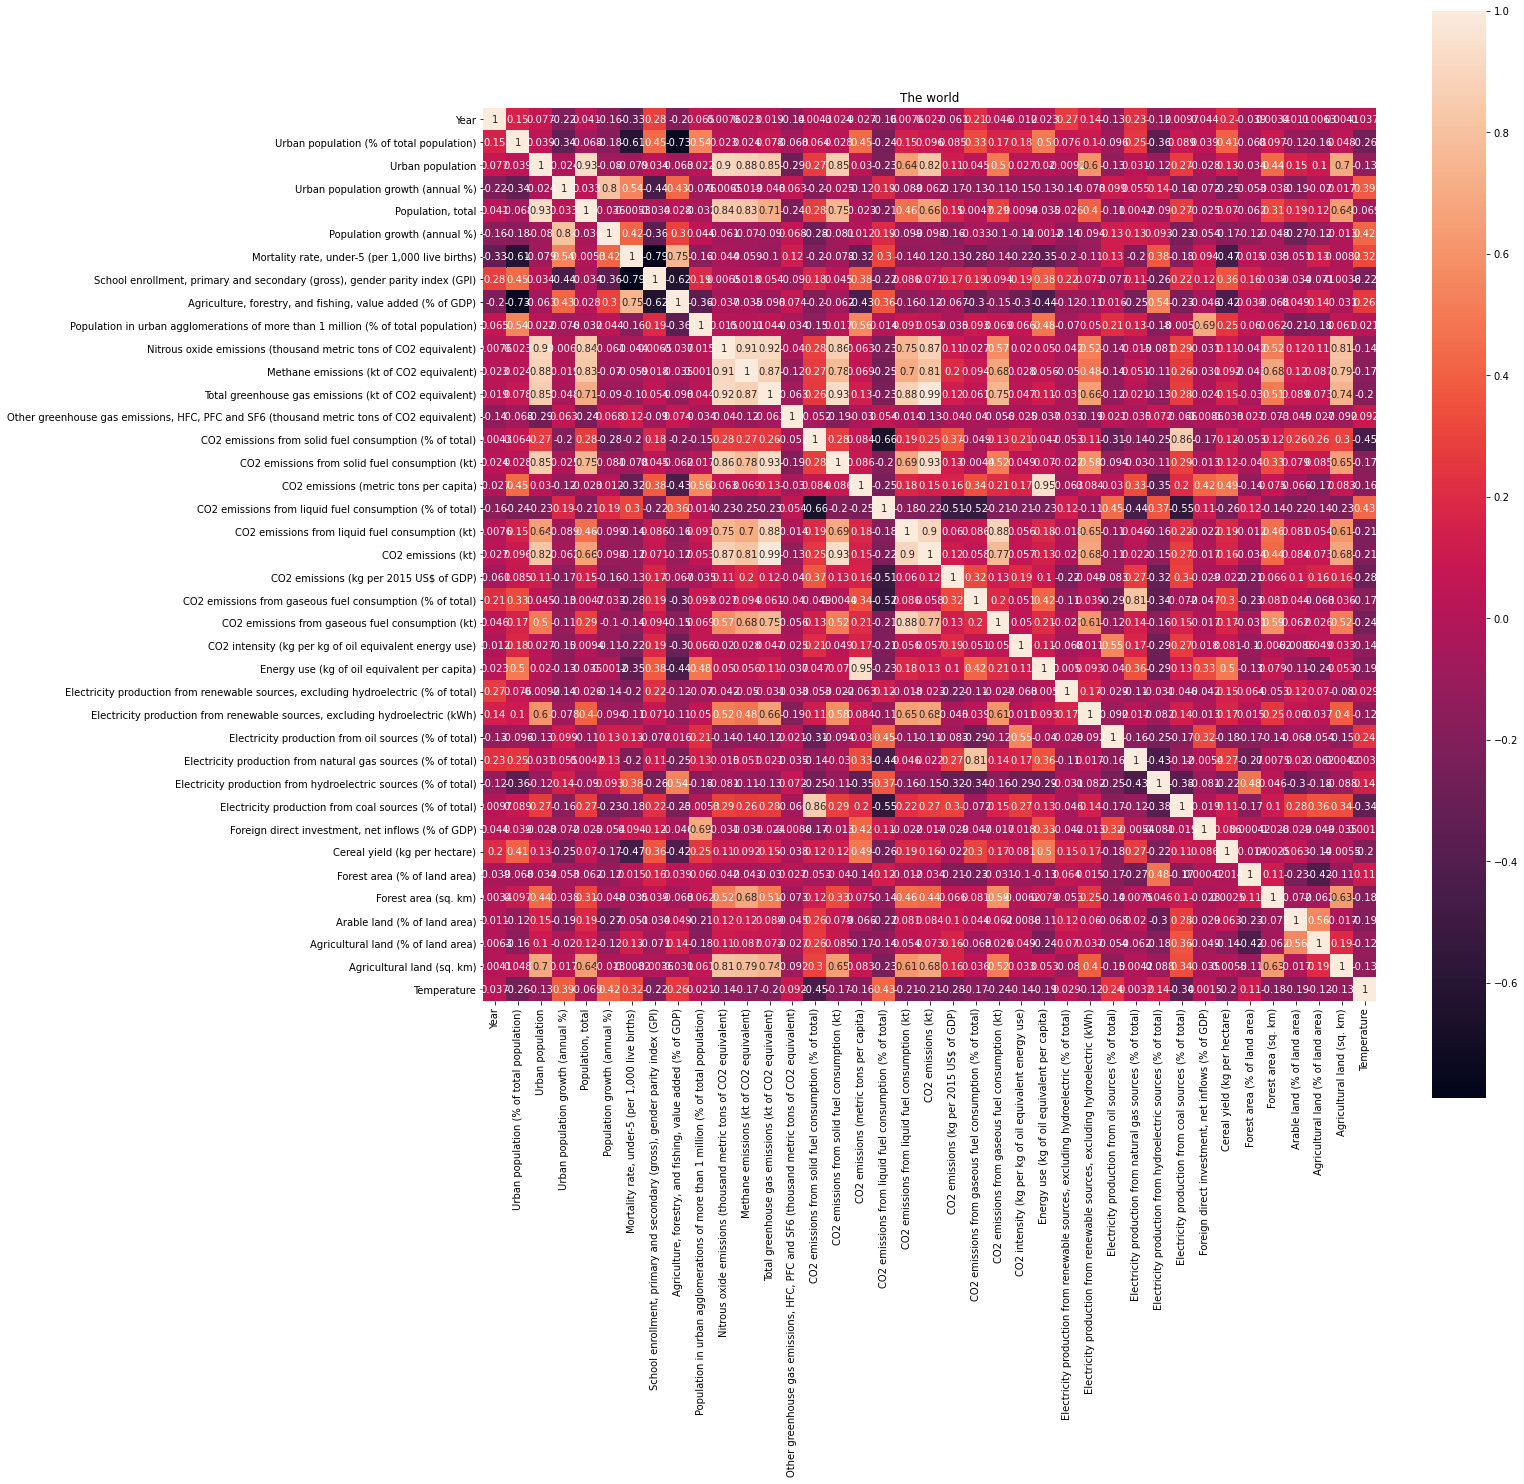

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr,square=True,annot=True)
plt.title('The world')

In [10]:
df_corr.loc[:, ['Me']].sort_values(by="Temperature")

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.447040
Electricity production from coal sources (% of total),-0.339769
CO2 emissions (kg per 2015 US$ of GDP),-0.284435
Urban population (% of total population),-0.261484
CO2 emissions from gaseous fuel consumption (kt),-0.244707
"School enrollment, primary and secondary (gross), gender parity index (GPI)",-0.217988
CO2 emissions (kt),-0.211914
CO2 emissions from liquid fuel consumption (kt),-0.211273
Cereal yield (kg per hectare),-0.200852
Total greenhouse gas emissions (kt of CO2 equivalent),-0.198925


In [15]:
corr_2011_2020 = df[df['Year']>=2011].corr()

Text(0.5, 1.0, 'The world')

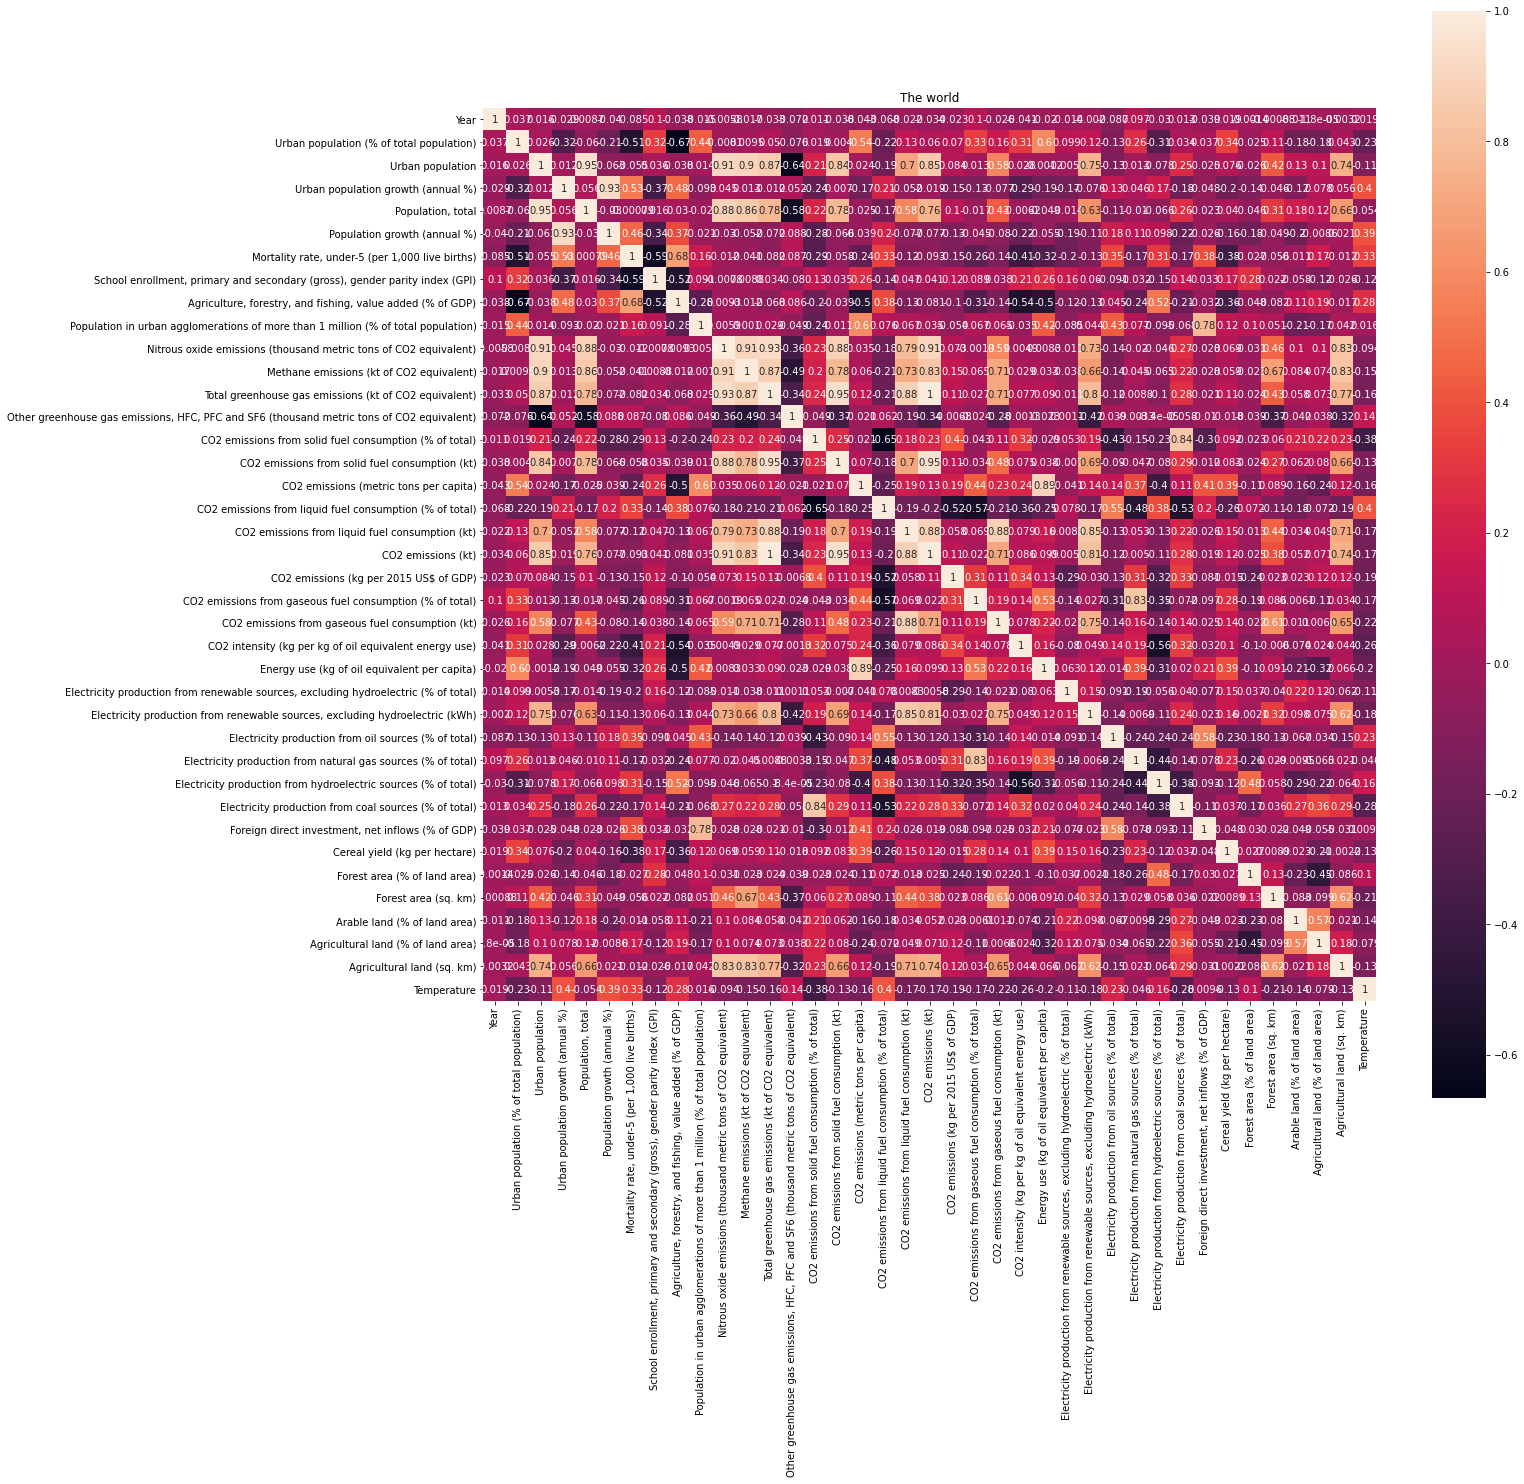

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_2011_2020,square=True,annot=True)
plt.title('The world')

In [17]:
corr_2011_2020.loc[:, ['Temperature']].sort_values(by="Temperature")

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.383711
Electricity production from coal sources (% of total),-0.280299
CO2 intensity (kg per kg of oil equivalent energy use),-0.260028
Urban population (% of total population),-0.227131
CO2 emissions from gaseous fuel consumption (kt),-0.220430
Forest area (sq. km),-0.208405
Energy use (kg of oil equivalent per capita),-0.201283
CO2 emissions (kg per 2015 US$ of GDP),-0.190169
"Electricity production from renewable sources, excluding hydroelectric (kWh)",-0.181514
CO2 emissions from liquid fuel consumption (kt),-0.169343
